In [103]:
import pandas as pd
import numpy as np
import ast

In [104]:
data = pd.read_csv('tmdb_5000_movies.csv')
data.drop(columns=[ 'id', 'homepage', 'original_language', 
                   'production_companies', 'production_countries', 'spoken_languages',
                   'release_date', 'status', 'title'], inplace = True)
dictColumns = ['genres', 'keywords']
def transform(l):
    return ' '.join([x['name'] for x in l])
for col in dictColumns:
    data[col] = data[col].apply(ast.literal_eval)
    data[col] = data[col].apply(transform)
# data.fillna('', inplace = True)

In [105]:
data.head(11)

,budget,genres,keywords,original_title,overview,popularity,revenue,runtime,tagline,vote_average,vote_count
0,237000000,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,Enter the World of Pandora.,7.2,11800
1,300000000,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500
2,245000000,Action Adventure Crime,spy based on novel secret agent sequel mi6 bri...,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,880674609,148.0,A Plan No One Escapes,6.3,4466
3,250000000,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,1084939099,165.0,The Legend Ends,7.6,9106
4,260000000,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,John Carter,"John Carter is a war-weary, former military ca...",43.926995,284139100,132.0,"Lost in our world, found in another.",6.1,2124
5,258000000,Fantasy Action Adventure,dual identity amnesia sandstorm love of one's ...,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,890871626,139.0,The battle within.,5.9,3576
6,260000000,Animation Family,hostage magic horse fairy tale musical princes...,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,591794936,100.0,They're taking adventure to new lengths.,7.4,3330
7,280000000,Action Adventure Science Fiction,marvel comic sequel superhero based on comic b...,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,1405403694,141.0,A New Age Has Come.,7.3,6767
8,250000000,Adventure Fantasy Family,witch magic broom school of witchcraft wizardr...,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,933959197,153.0,Dark Secrets Revealed,7.4,5293
9,250000000,Action Adventure Fantasy,dc comics vigilante superhero based on comic b...,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,873260194,151.0,Justice or revenge,5.7,7004


In [116]:
to_data = pd.DataFrame({'budget' : data['budget'],
                       'popularity' : data['popularity'],
                       'revenue': data['revenue'],
                       'runtime' : data['runtime'],
                       'vote_average' : data['vote_average'],
                       'vote_count' : data['vote_count']})
to_data.fillna(0, inplace = True)


to_data.describe().to_csv('myData_describe.csv')
to_data = (to_data - to_data.min()) / (to_data.max() - to_data.min())

text = data[['original_title', 'genres','tagline','keywords','overview']].fillna('')
to_data['text'] = '[CLS] ' + text.apply(lambda x: ' [SEP] '.join(x), axis = 1) + ' [SEP]'
to_data.to_csv('myData.csv', index=None)

In [115]:
to_data

,budget,popularity,revenue,runtime,vote_average,vote_count,text
0,0.623684,0.171815,1.000000,0.479290,0.72,0.858057,[CLS] Avatar [SEP] Action Adventure Fantasy Sc...
1,0.789474,0.158846,0.344696,0.500000,0.69,0.327225,[CLS] Pirates of the Caribbean: At World's End...
2,0.644737,0.122635,0.315884,0.437870,0.63,0.324753,[CLS] Spectre [SEP] Action Adventure Crime [SE...
3,0.657895,0.128272,0.389151,0.488166,0.76,0.662158,[CLS] The Dark Knight Rises [SEP] Action Crime...
4,0.684211,0.050169,0.101916,0.390533,0.61,0.154450,[CLS] John Carter [SEP] Action Adventure Scien...
...,...,...,...,...,...,...,...
4798,0.000579,0.016298,0.000732,0.239645,0.66,0.017307,[CLS] El Mariachi [SEP] Action Crime Thriller ...
4799,0.000024,0.000734,0.000000,0.251479,0.59,0.000364,[CLS] Newlyweds [SEP] Comedy Romance [SEP] A n...
4800,0.000000,0.001650,0.000000,0.355030,0.70,0.000436,"[CLS] Signed, Sealed, Delivered [SEP] Comedy D..."
4801,0.000000,0.000979,0.000000,0.289941,0.57,0.000509,[CLS] Shanghai Calling [SEP] [SEP] A New York...


In [81]:
test = pd.DataFrame({'text' : '[CLS] ' + data[[
                                      'original_title', 
                                      'genres',
                                      'tagline']].apply(lambda x: ' [SEP] '.join(x), axis = 1) + ' [SEP]'}).values[:,0]
test.shape

(4803,)

In [82]:
m = 0
index = 0

for i, s in enumerate(test):
    if len(s.split(' ')) > m:
        m = len(s.split(' '))
#         print(s)
        index = i
print(m)

print(test[index])

62
[CLS] Coal Miner's Daughter [SEP] Drama Music [SEP] She was married at 13. She had four kids by the time she was 20. She's been hungry and poor. She's been loved and cheated on. She became a singer because it was the only thing she could do. She became a star because it was the only way she could do it. [SEP]


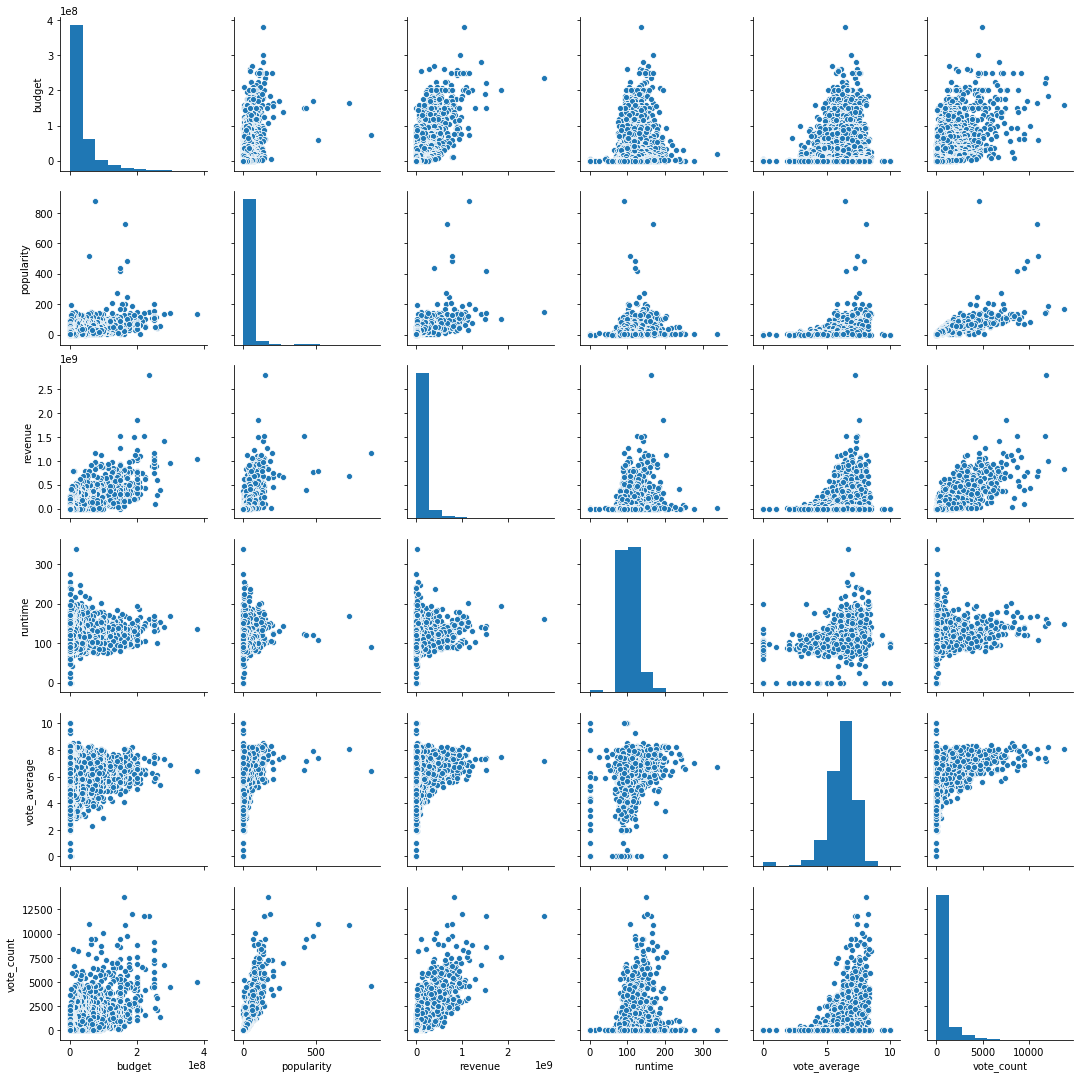

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
numberData = data[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']]
sns.pairplot(numberData)